In [60]:
import os
import subprocess
os.chdir('/Users/Ismael/code/lensing/repo/')
#plot inline
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
import models
import galsim

In [35]:
#this program tests several features of the new models.py program. 

In [36]:
#check the parameters 
print models.get_gal_parameters()
print models.get_psf_parameters()
print models.get_all_models()
print models.get_all_psf_models()
print models.get_fieldnames()

['hlr', 'n_d', 'y0', 'fwhm', 'n_b', 'flux_d', 'flux_b', 'delta_theta', 'g2', 'g1', 'R_r', 'flux_b/flux_total', 'beta', 'delta_e', 'x0', 'e1', 'e2', 'e', 'eta1', 'eta2', 'q', 'flux', 'hlr_b', 'sigma', 'hlr_d']
['psf_e2', 'psf_e1', 'psf_fwhm', 'psf_flux', 'psf_beta', 'psf_hlr']
['gaussian', 'exponential', 'deVaucouleurs', 'bulgeDisk', 'bulgeDisk6']
['psf_gaussian', 'psf_moffat']
['id', 'galaxy_model', 'psf_model', 'hlr', 'n_d', 'y0', 'fwhm', 'n_b', 'flux_d', 'flux_b', 'delta_theta', 'g2', 'g1', 'R_r', 'flux_b/flux_total', 'beta', 'delta_e', 'x0', 'e1', 'e2', 'e', 'eta1', 'eta2', 'q', 'flux', 'hlr_b', 'sigma', 'hlr_d', 'psf_e2', 'psf_e1', 'psf_fwhm', 'psf_flux', 'psf_beta', 'psf_hlr']


In [37]:
#see if getting a galaxy profile works

In [50]:
cmd = ('python generate.py -p project4 -gal 1 --psf_model psf_gaussian --galaxy-model gaussian --e1 0 --e2 0 --y0 0 --x0 0 \
--flux 1. --psf_flux 1. --hlr 1. --psf_fwhm .7 --snr 20 --pixel_scale .2 --nx 20 --ny 20') 
a = subprocess.call(cmd,shell=True)

In [103]:
import fisher
import galfun

In [104]:
stamp = galsim.Image(40,40,scale=.4)

In [105]:
g_parameters = galfun.GParameters('project4')
image_renderer = galfun.ImageRenderer(pixel_scale=float(.2),
                                      nx=float(40.),ny=float(40.), stamp=stamp)
fish = fisher.Fisher(g_parameters=g_parameters,image_renderer=image_renderer, 
                     snr=20.)

In [106]:
fish.derivatives_images.keys()

['hlr_1', 'e2_1', 'x0_1', 'flux_1', 'e1_1', 'y0_1']

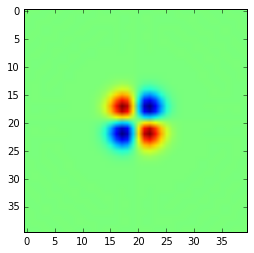

In [107]:
plt.figure()
plt.imshow(fish.derivatives_images['e2_1'])